In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [531]:
"FUNCIONES"


# Oferta Agregada

def Aggregate_supply(θ, w, b):
    
    return (1 + θ)*w/b

# Demanda Agregada

def Aggregate_demand(b, a, w, y):
    return  y*w/(b * (y - a))

In [532]:
"PARÁMETROS"

escenarios = 5 

θ  = np.full(escenarios, 0.5, dtype = float)    # Mark-up sobre los costos
a  = np.full(escenarios, 1.7, dtype = float)    # Inversión real
b  = np.full(escenarios, 1.2, dtype = float)    # Productividad del trabajo
w  = np.full(escenarios, 0.2, dtype = float)    # Salario nominal

y  = np.arange(2.55, 15, 0.01) # Dominio (producto)

In [533]:
"SHOCKS"

escenarios = 5

for i in range (1, escenarios):
    
    if i == 1:
    
    # Escenario 1: Shock negativo del mark-up
        θ[i] = 0.3
       
    if i == 2:
    
    # Escenario 2: Shock positivo del salario nominal

        w[i] = 0.25  
        
    if i == 3:
    
    # Escenario 3: Shock positivo de la inversión real

        a[i] = 2.5  
        
    if i == 4:

    # Escenario 4: Shock positivo de la productividad del trabajo

        b[i] = 1.4 

In [534]:
GS  = {} 
AD  = {} 

ye  = {}
pe  = {}
Ne  = {}

for i in range (0, escenarios):
    
    # Curva de oferta agregada
    
    GS['e{0}'.format(i)] = Aggregate_supply(θ[i], w[i], b[i])
    
    
    # Curva de demanda agregada

    AD['e{0}'.format(i)] = Aggregate_demand(b[i], a[i], w[i], y)
    
    # Producción de equilibrio

    ye['e{0}'.format(i)] = a[i]*(1 + θ[i])/θ[i]
    
    # Precio de equilibrio
    
    pe['e{0}'.format(i)] = Aggregate_demand(b[i], a[i], w[i], ye['e{0}'.format(i)])
    
    # Empleo de equilibrio
    
    Ne['e{0}'.format(i)] = ye['e{0}'.format(i)]/b[i]

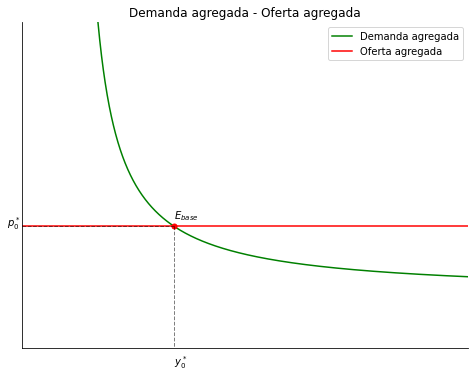

In [535]:
"GRÁFICA: ESCENARIO BASE"

xmin, xmax, ymin, ymax = 0, 15, 0.1, 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, AD['e0'], color= 'Green', label= 'Demanda agregada')
ax.axhline(GS['e0'], color = 'Red',  label= 'Oferta agregada')
ax.plot(ye['e0'], pe['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([ye['e0'], ye['e0']], [0, pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e0']], [pe['e0'], pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Demanda agregada - Oferta agregada')
ax.text(ye['e0'], pe['e0'] + 0.01, '$E_{base}$')
ax.text(-0.5, pe['e0'], '$p_{0}^*$')
ax.text(ye['e0'], 0.08, '$y_{0}^*$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.legend()
plt.show()

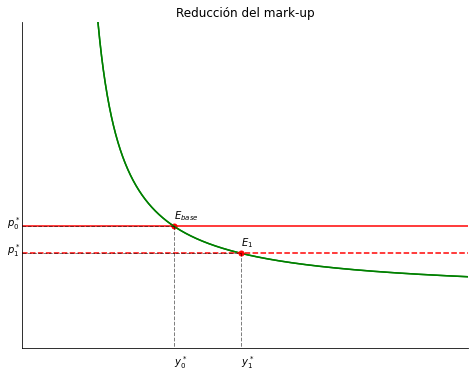

In [536]:
"GRÁFICA: REDUCCIÓN DEL MARK-UP"

xmin, xmax, ymin, ymax = 0, 15, 0.1, 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, AD['e0'], color= 'Green')
ax.axhline(GS['e0'], color = 'Red')
ax.plot(ye['e0'], pe['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(y, AD['e1'], color= 'Green')
ax.axhline(GS['e1'], color = 'Red', ls='--')
ax.plot(ye['e1'], pe['e1'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([ye['e0'], ye['e0']], [0, pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e0']], [pe['e0'], pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([ye['e1'], ye['e1']], [0, pe['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e1']], [pe['e1'], pe['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Reducción del mark-up')
ax.text(ye['e0'], pe['e0'] + 0.01, '$E_{base}$')
ax.text(ye['e1'], pe['e1'] + 0.01, '$E_{1}$')
ax.text(-0.5, pe['e0'], '$p_{0}^*$')
ax.text(ye['e0'], 0.08, '$y_{0}^*$')
ax.text(-0.5, pe['e1'], '$p_{1}^*$')
ax.text(ye['e1'], 0.08, '$y_{1}^*$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

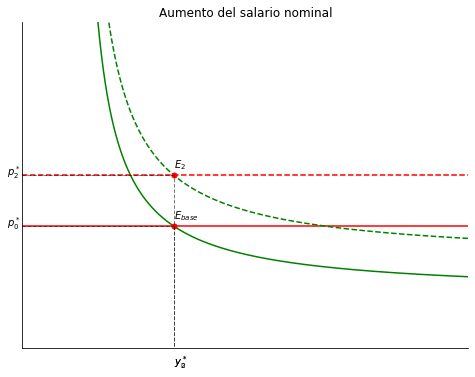

In [537]:
"GRÁFICA: AUMENTO DEL SALARIO NOMINAL"

xmin, xmax, ymin, ymax = 0, 15, 0.1, 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, AD['e0'], color= 'Green')
ax.axhline(GS['e0'], color = 'Red')
ax.plot(y, AD['e2'], color= 'Green', ls='--')
ax.axhline(GS['e2'], color = 'Red',  ls='--')
ax.plot(ye['e0'], pe['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(ye['e2'], pe['e2'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([ye['e0'], ye['e0']], [0, pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e0']], [pe['e0'], pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([ye['e2'], ye['e2']], [0, pe['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e2']], [pe['e2'], pe['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del salario nominal')
ax.text(ye['e0'], pe['e0'] + 0.01, '$E_{base}$')
ax.text(ye['e2'], pe['e2'] + 0.01, '$E_{2}$')
ax.text(-0.5, pe['e0'], '$p_{0}^*$')
ax.text(ye['e0'], 0.08, '$y_{0}^*$')
ax.text(-0.5, pe['e2'], '$p_{2}^*$')
ax.text(ye['e2'], 0.08, '$y_{2}^*$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

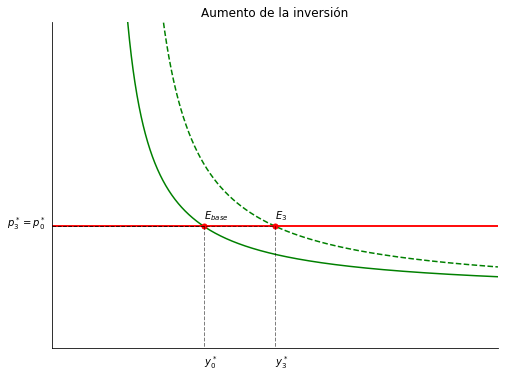

In [538]:
"GRÁFICA: AUMENTO DE LA INVERSIÓN"

xmin, xmax, ymin, ymax = 0, 15, 0.1, 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, AD['e0'], color= 'Green')
ax.axhline(GS['e0'], color= 'Red')
ax.plot(y, AD['e3'], color= 'Green', ls='--')
ax.axhline(GS['e3'], color = 'Red')
ax.plot(ye['e0'], pe['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(ye['e3'], pe['e3'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([ye['e0'], ye['e0']], [0, pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e0']], [pe['e0'], pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([ye['e3'], ye['e3']], [0, pe['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e3']], [pe['e3'], pe['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento de la inversión')
ax.text(ye['e0'], pe['e0'] + 0.01, '$E_{base}$')
ax.text(ye['e3'], pe['e3'] + 0.01, '$E_{3}$')
ax.text(ye['e0'], 0.08, '$y_{0}^*$')
ax.text(-1.5, pe['e3'], '$p_{3}^* = p_{0}^*$')
ax.text(ye['e3'], 0.08, '$y_{3}^*$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

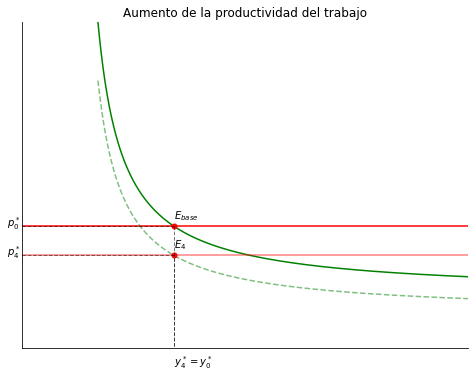

In [539]:
"GRÁFICA: AUMENTO DE LA PRODUCTIVIDAD DEL TRABAJO"

xmin, xmax, ymin, ymax = 0, 15, 0.1, 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, AD['e0'], color= 'Green')
ax.axhline(GS['e0'], color = 'Red')
ax.plot(y, AD['e4'], color= 'Green', alpha= 0.5, ls='--')
ax.axhline(GS['e4'], color = 'Red', alpha= 0.5,)
ax.plot(ye['e0'], pe['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(ye['e4'], pe['e4'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([ye['e0'], ye['e0']], [0, pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e0']], [pe['e0'], pe['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([ye['e4'], ye['e4']], [0, pe['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, ye['e4']], [pe['e4'], pe['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento de la productividad del trabajo')
ax.text(ye['e0'], pe['e0'] + 0.01, '$E_{base}$')
ax.text(ye['e4'], pe['e4'] + 0.01, '$E_{4}$')
ax.text(-0.5, pe['e0'], '$p_{0}^*$')
ax.text(-0.5, pe['e4'], '$p_{4}^*$')
ax.text(ye['e4'], 0.08, '$y_{4}^* = y_{0}^*$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

In [559]:
"RESUMEN"

resumen = pd.DataFrame({r'$y$': ye,
                        r'$p$': pe,
                        r'$N$': Ne,
                       },).rename(index={'e0':r'$Base$',
                                         'e1':r'$\Delta \theta = - 0.20$',
                                          'e2':r'$\Delta w = + 0.05$',
                                          'e3':r'$\Delta a = + 0.80$',
                                          'e4':r'$\Delta b = + 0.20$',
                                         }).round(4)
resumen

,$y$,$p$,$N$
$Base$,5.1000,0.2500,4.2500
$\Delta \theta = - 0.20$,7.3667,0.2167,6.1389
$\Delta w = + 0.05$,5.1000,0.3125,4.2500
$\Delta a = + 0.80$,7.5000,0.2500,6.2500
$\Delta b = + 0.20$,5.1000,0.2143,3.6429
